# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [2]:
# Importando o pandas
import pandas as pd

In [3]:
# Importar a base em excel
# - Base: 08. Analisando o engajamento no Instagram.xlsx
#base = pd.read_csv("")
base = pd.read_csv("08. Analisando o engajamento no Instagram.xlsx - Base.csv")

In [4]:
# Visualizando as 5 primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,11-Sep,"2,858",16,NaN,Loja,N,N,NaN,"2,874"
1,Foto,11-Sep,"2,930",28,NaN,Loja/Produtos,N,N,NaN,"2,958"
2,Foto,11-Sep,"2,807",9,NaN,Loja,N,N,NaN,"2,816"
3,Vídeo,12-Sep,"5,115",49,"82,878",Produtos,N,N,NaN,"5,164"
4,Foto,13-Sep,"4,392",45,NaN,Produtos,S,N,NaN,"4,437"


### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

**O .drop() permite apagar uma coluna ou linha da base:** <br>
base<font color="blue">**.drop(**</font>nome_coluna,axis=1<font color="blue">**)**</font>
- O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [5]:
# Apagando a coluna "Visualizações"
base = base.drop("Visualizações",axis=1)

In [6]:
# Visualizando novamente as 5 primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,11-Sep,"2,858",16,Loja,N,N,NaN,"2,874"
1,Foto,11-Sep,"2,930",28,Loja/Produtos,N,N,NaN,"2,958"
2,Foto,11-Sep,"2,807",9,Loja,N,N,NaN,"2,816"
3,Vídeo,12-Sep,"5,115",49,Produtos,N,N,NaN,"5,164"
4,Foto,13-Sep,"4,392",45,Produtos,S,N,NaN,"4,437"


In [7]:
# Visualizando as 5 últimas linhas
base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,12-Mar,"5,489",77,Dicas de como usar/Novos Produtos,S,N,NaN,"5,566"
48,Foto,20-Mar,"29,084",479,Datas comemorativas/Promoções,S,S,NaN,"29,563"
49,Foto,22-Mar,"9,087",106,NaN,S,S,NaN,"9,193"
50,Foto,26-Mar,"16,551",186,NaN,S,N,NaN,"16,737"
51,IGTV,27-Mar,"4,934",65,Dicas de como usar/Produtos,S,N,NaN,"4,999"


In [12]:
# Tamanho da base
base.shape

(52, 9)

In [13]:
# Se a base for pequena, o display mostra a base completa
display(base)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,11-Sep,"2,858",16,Loja,N,N,NaN,"2,874"
1,Foto,11-Sep,"2,930",28,Loja/Produtos,N,N,NaN,"2,958"
2,Foto,11-Sep,"2,807",9,Loja,N,N,NaN,"2,816"
3,Vídeo,12-Sep,"5,115",49,Produtos,N,N,NaN,"5,164"
4,Foto,13-Sep,"4,392",45,Produtos,S,N,NaN,"4,437"
5,Foto,17-Sep,"5,359",62,Novos Produtos,N,S,S,"5,421"
6,Foto,19-Sep,"21,597",852,Novos Produtos,S,S,NaN,"22,449"
7,Foto,25-Sep,"6,346",33,Produtos,N,S,NaN,"6,379"
8,Foto,27-Sep,"6,355",89,Produtos,S,N,S,"6,444"
9,Vídeo,28-Sep,"4,056",81,Produtos,N,N,NaN,"4,137"


In [14]:
# Verificando as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         52 non-null     object
 1   Data         52 non-null     object
 2   Curtidas     52 non-null     object
 3   Comentários  52 non-null     int64 
 4   Tags         44 non-null     object
 5   Pessoas      52 non-null     object
 6   Campanhas    52 non-null     object
 7   Carrossel    8 non-null      object
 8   Interacoes   52 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.8+ KB


### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [9]:
# Contando os valores que aparecem na coluna Carrossel
base.Carrossel.value_counts()

S    8
Name: Carrossel, dtype: int64

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [10]:
# Filtrando os valores em que carrossel é nulo
base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,11-Sep,"2,858",16,Loja,N,N,NaN,"2,874"
1,Foto,11-Sep,"2,930",28,Loja/Produtos,N,N,NaN,"2,958"
2,Foto,11-Sep,"2,807",9,Loja,N,N,NaN,"2,816"
3,Vídeo,12-Sep,"5,115",49,Produtos,N,N,NaN,"5,164"
4,Foto,13-Sep,"4,392",45,Produtos,S,N,NaN,"4,437"


In [13]:
# Buscando valores que NAO sao nulos
base.loc[base.Carrossel.notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,17-Sep,"5,359",62,Novos Produtos,N,S,S,"5,421"
8,Foto,27-Sep,"6,355",89,Produtos,S,N,S,"6,444"
12,Foto,21-Oct,"6,166",55,Novos Produtos,S,S,S,"6,221"
21,Foto,23-Dec,"8,328",93,Produtos,S,N,S,"8,421"
25,Foto,2-Jan,"12,193",138,Novos Produtos,S,N,S,"12,331"


In [15]:
# Selecionando apenas a coluna Carrossel
base.loc[base.Carrossel.isnull(),"Carrossel"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
6     NaN
7     NaN
9     NaN
10    NaN
11    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
22    NaN
23    NaN
24    NaN
27    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
Name: Carrossel, dtype: object

In [17]:
# Agora vamos atribuir o valor N para essa coluna
base.loc[base.Carrossel.isnull(),"Carrossel"]="N"

**Verificando novamente os valores de Carrossel:**

In [19]:
# Verificando novamente os valores dessa coluna
base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


### Mostrando as informações estatísticas

In [21]:
# Descrição estatística da base
base.describe()

,Comentários
count,52.000000
mean,189.500000
std,170.687709
min,9.000000
25%,69.500000
50%,128.000000
75%,265.250000
max,852.000000


### Visualizando essas informações de maneira gráfica

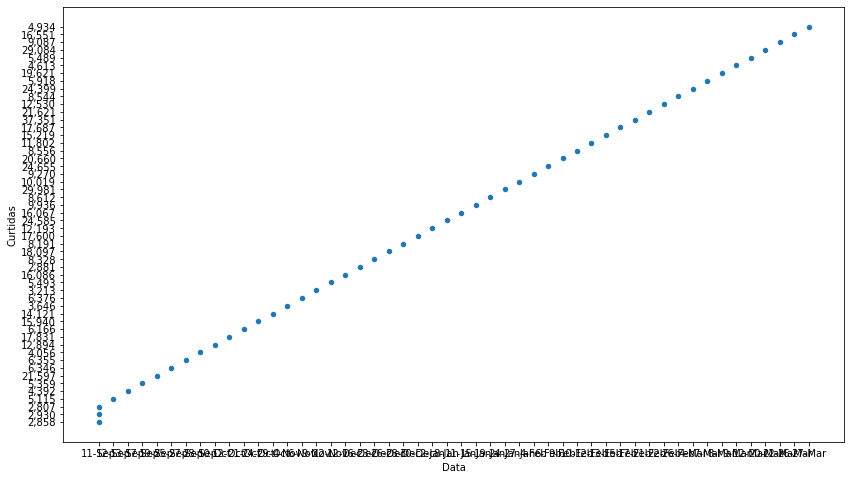

In [5]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
base.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

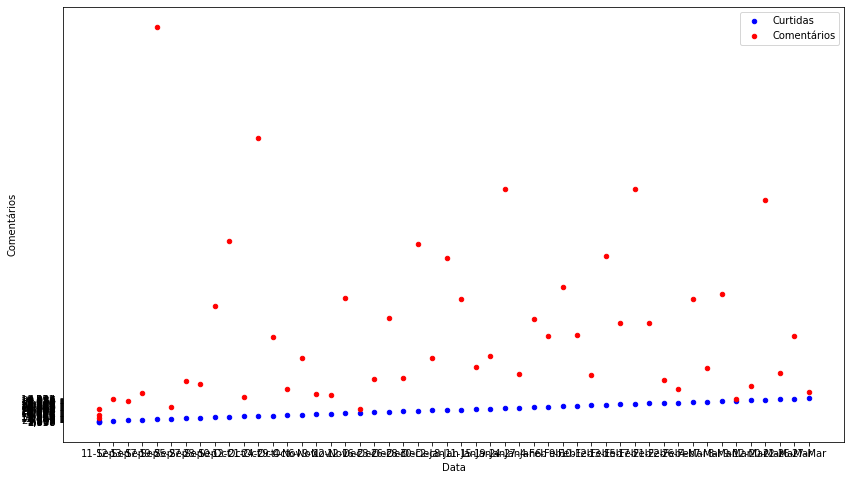

In [6]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = base.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

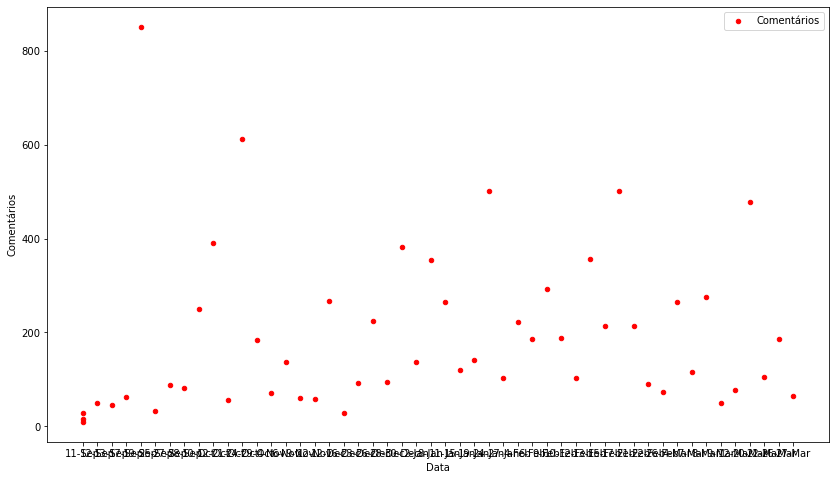

In [7]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [22]:
# Ordenando os valores
base.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
28,Foto,15-Jan,"9,936",119,Novos Produtos,S,N,S,"10,055"
32,IGTV,4-Feb,"9,270",222,Dicas de como usar/Produtos,S,N,N,"9,492"
49,Foto,22-Mar,"9,087",106,NaN,S,S,N,"9,193"
29,Foto,19-Jan,"8,612",142,NaN,S,N,N,"8,754"
35,IGTV,10-Feb,"8,556",188,Dicas de como usar/Produtos,S,N,N,"8,744"


In [9]:
# Selecionando os 5 últimos valores 
base.sort_values(by="Curtidas",ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
10,Reels,10-Oct,"12,894",249,"92,120",Trends/Produtos,S,N,NaN,"13,143"
41,Foto,22-Feb,"12,530",90,NaN,NaN,S,N,NaN,"12,620"
25,Foto,2-Jan,"12,193",138,NaN,Novos Produtos,S,N,S,"12,331"
36,Foto,12-Feb,"11,802",102,NaN,Produtos,S,S,NaN,"11,904"
31,Foto,27-Jan,"10,019",103,NaN,Novos Produtos,S,N,NaN,"10,122"


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vamos usar o <font color="blue">group by</font> para entender melhor os dados

**O group by é muito análogo a tabela dinâmica que fazemos no Excel**

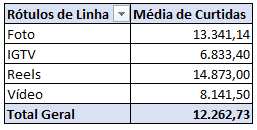

In [23]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [26]:
# Agrupando as informações por tipo
base.groupby("Tipo")["Comentários"].count()

Tipo
Foto     36
IGTV      5
Reels     5
Vídeo     6
Name: Comentários, dtype: int64

TypeError: Could not convert 2,8582,9302,8074,3925,35921,5976,3466,35517,8316,16615,94014,12116,0862,8818,32818,0978,19112,19324,58516,0679,9368,61210,01924,65520,66011,80217,68737,35121,62112,5308,54424,3994,61329,0849,08716,551 to numeric

- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

**O groupby nos permite agregar os dados, o que facilita muito a visualização** <br>
base.<font color="blue">**groupby**</font>("<font color="red">**coluna1**</font>")["<font color="green">**coluna2**</font>"].<font color="purple">**funcao_agregacao()**</font>

- O groupby vai agregar pela <font color="red">**coluna1**</font>
- A <font color="purple">**função de agregação**</font> será aplicada na <font color="green">**coluna2**</font>

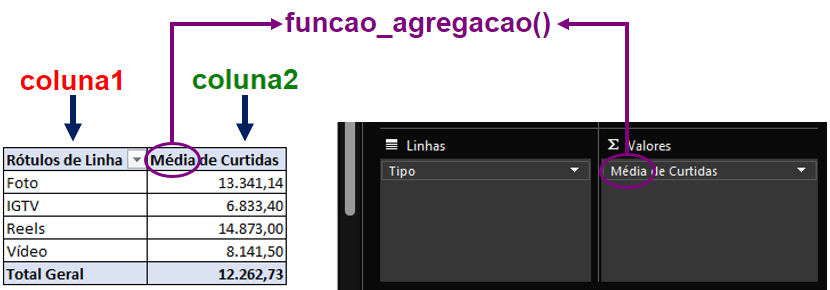

**Inclusive é possível agregar por mais de 1 coluna:** <br>

In [25]:
# Agrupando por Tipo e Pessoas
base.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

TypeError: Could not convert 2,8582,9302,8075,3596,3462,881 to numeric

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [ ]:
base.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

In [63]:
# Incluindo a coluna de campanhas

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [ ]:
# Somente para pessoas

- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [ ]:
# Somente para campanhas

- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [ ]:
# Carrossel (sem filtrar a base)

In [ ]:
# Podemos também filtrar a base

- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [64]:
# Agregando por pessoas e campanhas

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [65]:
# Agregando por pessoas, campanhas e tipo

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [ ]:
# Vamos filtrar a base apenas onde o tipo é Vídeo

- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**